# HAMS Data Quality Challenge!

## Database file - Challenge.db
--------------------------------------------
************ TABLES *************

session_sources: 

session_id: unique identifier of this session
user_id: user identifier
event_date: date when the session happened
event_time: time when the session happened
channel_name: traffic channel that started this session (e.g. 'Email')
campaign_name: advertising campaign name that started this session (e.g. 'adwords_campaign_123')
campaign_id: campaign identifier that started this session (not all sessions have a campaign_id)
market: regional market that this session belongs to (e.g. 'DE' for Germany)
cpc: cost-per-click of this (this is how much was paid for this session, you can assume its in Euro)
conversions:

conv_id: unique identifier of this conversion
user_id: user identifier
conv_date: date when the conversion happened
market: regional market that this conversion belongs to
revenue: conversion amount (i.e. how much revenue the company earned through this conversion, you can assume its in Euro)
conversions_backend :

conv_id: unique identifier of this conversion
user_id: user identifier
conv_date: date when the conversion happened
market: regional market that this conversion belongs to
revenue: conversion amount
api_adwords_costs :

event_date: date when the AdWords campaign was running
campaign_id: campaign identifier
cost: amount that was spent on running this campaign on this day (assume its in Euro)
clicks: number of times a user clicked on this ad on the given day
attribution_customer_journey :

conv_id: conversion identifier
session_id: session identifier that belonged in the customer journey of the given conv_id
ihc: 'value' of the given session in the given customer journey (1 = 100%)

Note: the sum of 'ihc' column in the 'attribution_customer_journey' should be equal to 1 (100%) for each 'conv_id'

In [61]:
#Importing packages
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
#Connecting to Database
ch = sqlite3.connect('/home/kaveri/Downloads/challenge.db')

### Question 1 : Are the costs in the 'api_words_costs' table fully covered in the 'session_sources' table? Any campaigns where you see issues?

    --total sum of all the campaigns in sessions - 681,770
    --total sum of all the campaigns in api_adwords_costs - 456,885
    --Number of records excluding all zero value sessions and notset campaign_ids - 857 records
    --3537 records are not present in 'api_words_costs' table.



In [29]:
cur = ch.cursor()

In [30]:
cur.execute("select * from api_adwords_costs where event_date = '2021-07-04' and campaign_id ='campaign_id_10' order by campaign_id;").fetchall()


[('2021-07-04', 'campaign_id_10', 393.25, 355)]

In [31]:
cur.execute("select *, sum(cpc) as sum from session_sources where  event_date = '2021-07-04' and campaign_id = 'campaign_id_10' ;").fetchall()

[('session_id_352507',
  'user_id_383344',
  '2021-07-04',
  '20:46:46',
  'SEA - Branded',
  'campaign_name_741',
  'campaign_id_10',
  'GB',
  0.819,
  393.29399999999845)]

In [32]:
cur.execute("select *, ceil(sum(cpc)) as sum from session_sources where  event_date = '2021-07-04' and campaign_id = 'campaign_id_10' ;").fetchall()

[('session_id_352507',
  'user_id_383344',
  '2021-07-04',
  '20:46:46',
  'SEA - Branded',
  'campaign_name_741',
  'campaign_id_10',
  'GB',
  0.819,
  394.0)]

In [33]:
cur.execute("select *, sum(cpc) as sum from session_sources group by event_date, campaign_id;").fetchall()

[('session_id_1156194',
  'user_id_633906',
  '2021-07-01',
  '10:49:34',
  'Shopping - Branded',
  'campaign_name_741',
  'campaign_id_1',
  'GB',
  0.0,
  0.0),
 ('session_id_906781',
  'user_id_185996',
  '2021-07-01',
  '18:35:23',
  'SEA - Brand',
  'campaign_name_741',
  'campaign_id_10',
  'DE',
  1.295,
  292.8070000000007),
 ('session_id_127427',
  'user_id_1074500',
  '2021-07-01',
  '22:51:07',
  'SEA - Non-branded',
  'campaign_name_741',
  'campaign_id_100',
  'NL',
  0.7,
  11.572000000000003),
 ('session_id_37255',
  'user_id_315580',
  '2021-07-01',
  '22:12:46',
  'SEA - Brand',
  'campaign_name_741',
  'campaign_id_101',
  'DE',
  0.833,
  8.899),
 ('session_id_464795',
  'user_id_648791',
  '2021-07-01',
  '20:36:46',
  'SEA - Non-branded',
  'campaign_name_741',
  'campaign_id_103',
  'NL',
  1.78,
  5.459999999999999),
 ('session_id_618611',
  'user_id_933902',
  '2021-07-01',
  '07:58:12',
  'SEA - Non-branded',
  'campaign_name_741',
  'campaign_id_106',
  'GB',


In [34]:
 #total sum of all the campaigns in sessions - 681,770

cur.execute("select sum(cost) from (select campaign_id, event_date, ceil(sum(cpc)) as cost, 'Sessions' as src_tbl from session_sources group by event_date, campaign_id)as Total_sum_of_campaign_cost_in_sessions ;").fetchall()   


[(681770.0,)]

In [35]:
#total sum of all the campaigns in api_adwords_costs - 456,885
cur.execute("select sum(cost) from (select campaign_id, event_date, ceil(cost) as cost, 'api_adwords_costs' as src_tbl from api_adwords_costs)as Total_sum_of_campaign_cost_in_sessions ;").fetchall()


[(456885.0,)]

In [36]:
#skip all zero value sessions and notset campaign_ids - 857 records
cur.execute("select * from (select *, count(*) as 'count_of_records' from (select campaign_id, event_date, ceil(sum(cpc)) as cost, 'Sessions' as src_tbl from session_sources group by event_date, campaign_id union select campaign_id, event_date, ceil(cost), 'api_adwords_costs' as src_tbl from api_adwords_costs) as result where cost > 0 group by campaign_id, event_date, cost order by (count_of_records))as result2 where count_of_records<>2 and campaign_id!='notset';").fetchall()


[('campaign_id_1', '2021-07-05', 1.0, 'Sessions', 1),
 ('campaign_id_1', '2021-07-06', 1.0, 'Sessions', 1),
 ('campaign_id_1', '2021-07-30', 1.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-05', 306.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-05', 308.0, 'api_adwords_costs', 1),
 ('campaign_id_10', '2021-07-09', 225.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-09', 226.0, 'api_adwords_costs', 1),
 ('campaign_id_10', '2021-07-10', 260.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-10', 261.0, 'api_adwords_costs', 1),
 ('campaign_id_10', '2021-07-14', 185.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-14', 186.0, 'api_adwords_costs', 1),
 ('campaign_id_10', '2021-07-17', 115.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-17', 116.0, 'api_adwords_costs', 1),
 ('campaign_id_10', '2021-07-21', 164.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-21', 165.0, 'api_adwords_costs', 1),
 ('campaign_id_10', '2021-07-22', 209.0, 'Sessions', 1),
 ('campaign_id_10', '2021-07-22', 210.0, 'a

In [37]:
#3537 records are not covered in 'api_words_costs' table
cur.execute("select *, 'not covered in api_adwords_costs' as comments from (select campaign_id, event_date, (sum(cpc)) as cost,'Sessions' as src_tbl from session_sources group by event_date, campaign_id except select campaign_id, event_date, cost ,'api_adwords_costs' as src_tbl from api_adwords_costs ) as result ; ").fetchall()


[('campaign_id_1',
  '2021-07-01',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-02',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-03',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-04',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-05',
  0.45,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-06',
  0.288,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-07',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-08',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-09',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-10',
  0.0,
  'Sessions',
  'not covered in api_adwords_costs'),
 ('campaign_id_1',
  '2021-07-11',
  0.0,
  'Se

In [38]:
#2987 records are lacking in 'Sessions' table.
cur.execute("select *, 'lacking in sessions' as comments from (select campaign_id, event_date, 'api_adwords_costs', cost as src_tbl from api_adwords_costs except select campaign_id, event_date, sum(cpc) as cost , 'Sessions' as src_tbl from session_sources group by event_date, campaign_id) as result ;").fetchall()


[('campaign_id_10',
  '2021-07-01',
  'api_adwords_costs',
  292.73,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-02',
  'api_adwords_costs',
  240.05,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-03',
  'api_adwords_costs',
  297.07,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-04',
  'api_adwords_costs',
  393.25,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-05',
  'api_adwords_costs',
  307.05,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-06',
  'api_adwords_costs',
  279.16,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-07',
  'api_adwords_costs',
  314.83,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-08',
  'api_adwords_costs',
  291.63,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-09',
  'api_adwords_costs',
  225.43,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-10',
  'api_adwords_costs',
  260.42,
  'lacking in sessions'),
 ('campaign_id_10',
  '2021-07-11',
  'api_adwords

### Question 2: Are the conversions in the 'conversions' table stable over time? Any pattern?

    --Pattern: 
        --There are total 17 conversions happened from '2021-07-15' to '2021-07-31'.
        --The difference of revenue amount among these is not same.
        --Hence, the company's revenue is not stable(fluctuating) over time.


In [39]:
cur.execute("select * from conversions;").fetchall()


[('conv_id_16788', 'user_id_569581', '2021-07-15', 'NL', 219.73),
 ('conv_id_9916', 'user_id_62541', '2021-07-15', 'DE', 104.21),
 ('conv_id_8443', 'user_id_494266', '2021-07-15', 'NL', 55.69),
 ('conv_id_8107', 'user_id_215383', '2021-07-15', 'NL', 66.12),
 ('conv_id_7835', 'user_id_69012', '2021-07-15', 'AT', 25.71),
 ('conv_id_2609', 'user_id_593835', '2021-07-15', 'DE', 50.42),
 ('conv_id_2721', 'user_id_1069431', '2021-07-15', 'DE', 29.03),
 ('conv_id_11478', 'user_id_758246', '2021-07-15', 'DE', 0.0),
 ('conv_id_5452', 'user_id_851102', '2021-07-15', 'AT', 54.31),
 ('conv_id_1147', 'user_id_233468', '2021-07-15', 'DE', 31.55),
 ('conv_id_87', 'user_id_376090', '2021-07-15', 'FR', 0.0),
 ('conv_id_7896', 'user_id_181943', '2021-07-15', 'FR', 24.16),
 ('conv_id_6367', 'user_id_1128698', '2021-07-15', 'FR', 50.0),
 ('conv_id_3026', 'user_id_1033323', '2021-07-15', 'NL', 19.42),
 ('conv_id_5331', 'user_id_770867', '2021-07-15', 'NL', 71.7),
 ('conv_id_3038', 'user_id_441394', '2021-0

In [40]:
# Grouping conversions by conv_date to check if the revenue is stable over time.
cur.execute("select conv_id, user_id, conv_date, ceil(sum(revenue)) as total_revenue from conversions group by conv_date;").fetchall()

[('conv_id_16788', 'user_id_569581', '2021-07-15', 48141.0),
 ('conv_id_2469', 'user_id_992646', '2021-07-16', 38389.0),
 ('conv_id_5708', 'user_id_42301', '2021-07-17', 34722.0),
 ('conv_id_844', 'user_id_979059', '2021-07-18', 74556.0),
 ('conv_id_4809', 'user_id_311289', '2021-07-19', 41765.0),
 ('conv_id_10309', 'user_id_552007', '2021-07-20', 37679.0),
 ('conv_id_14911', 'user_id_1050291', '2021-07-21', 37517.0),
 ('conv_id_6685', 'user_id_765164', '2021-07-22', 38042.0),
 ('conv_id_1240', 'user_id_263184', '2021-07-23', 36189.0),
 ('conv_id_15668', 'user_id_353673', '2021-07-24', 31102.0),
 ('conv_id_9527', 'user_id_506875', '2021-07-25', 37388.0),
 ('conv_id_311', 'user_id_674330', '2021-07-26', 58256.0),
 ('conv_id_10202', 'user_id_376047', '2021-07-27', 46238.0),
 ('conv_id_4902', 'user_id_674330', '2021-07-28', 44344.0),
 ('conv_id_12119', 'user_id_199345', '2021-07-29', 38262.0),
 ('conv_id_10988', 'user_id_199345', '2021-07-30', 134247.0),
 ('conv_id_7757', 'user_id_355912'

In [59]:
#Visualizing the result
sql = "select conv_id, user_id, conv_date, ceil(sum(revenue)) as total_revenue from conversions group by conv_date;"
data = pd.read_sql(sql, ch)

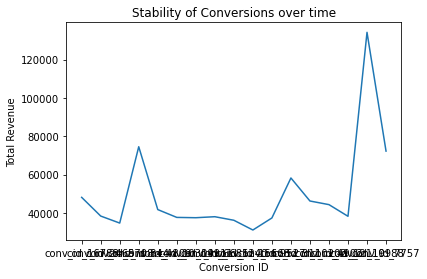

In [60]:
plt.plot(data.conv_id, data.total_revenue)
plt.title("Stability of Conversions over time")
plt.xlabel("Conversion ID")
plt.ylabel("Total Revenue")
plt.show()

### Question 3 : Double check conversions('conversions' table) with backend ('conversions_backend' table), any issues?

-- 705 records have anomalies in total.
-- Out of 705 total anamolies missing in both the tables 'conversions' and 'conversions_backend',

    -- Pattern one
        -- same ids(conv_id, user_id) but values(revenue) are different between 
        the two tables. 
        -- 344/705 records fall in this category.
        
    -- Pattern 2
        -- In remaining 361(705-344) records, 345 records missing in 'conversions' table. 
        
        -- 16 recods missing or not present in 'conversions_backend' but present in 'conversions'.


In [41]:
#PATTERN - 1
#record count 2 means they have same ids but differ in the revenue in the table.
df = pd.read_sql_query("select conv_id, conv_date, user_id, market, revenue, source, count(*) as 'count' from (select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions' as source from (select * from conversions_backend EXCEPT select * from conversions) as conv_backend union select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions_backend' as source from (select * from conversions EXCEPT select * from conversions_backend ) as conv)as result group by conv_id, conv_date, user_id order by count(*) desc;", ch)
print(df)

           conv_id   conv_date          user_id market  revenue  \
0    conv_id_10041  2021-07-30  user_id_1147740     NL     0.00   
1    conv_id_10055  2021-07-28   user_id_815190     GB     0.00   
2    conv_id_10449  2021-07-21   user_id_665055     DE     0.00   
3    conv_id_10480  2021-07-30   user_id_662105     NL     0.00   
4    conv_id_10545  2021-07-30     user_id_7939     NL     0.00   
..             ...         ...              ...    ...      ...   
528   conv_id_9658  2021-07-26   user_id_857982     GB    74.38   
529   conv_id_9767  2021-07-16   user_id_388803     DE    85.38   
530   conv_id_9850  2021-07-30    user_id_50959     NL    81.98   
531   conv_id_9922  2021-07-26   user_id_256582     NL    70.95   
532   conv_id_9954  2021-07-30   user_id_661299     NL    30.99   

                             source  count  
0    lacking in Conversions_backend      2  
1    lacking in Conversions_backend      2  
2    lacking in Conversions_backend      2  
3    lacking in

In [43]:
#-- count number of anamolies
cur.execute("select count(*) from (select conv_id, conv_date, user_id, market, revenue, 'Missing in Conversions' as source from (select * from conversions_backend EXCEPT select * from conversions) as result1 union select conv_id, conv_date, user_id, market, revenue, 'Missing in Conversions_backend' as source from (select * from conversions EXCEPT select * from conversions_backend ) as result2) as countOfMissingRecords").fetchall()


[(705,)]

In [44]:
#PATTERN - 2
#Out of remaining, 345 records missing in Conversions table.
cur.execute("select count(*) from (select conv_id, conv_date, user_id, market, revenue, source, count(*) as 'count_of_records' from (select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions' as source from (select * from conversions_backend EXCEPT select * from conversions) as conv_backend union select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions_backend' as source from (select * from conversions EXCEPT select * from conversions_backend ) as conv)as result group by conv_id, conv_date, user_id order by count(*) desc) as result3 where count_of_records <2 and source='lacking in Conversions'order by user_id").fetchall()

[(345,)]

In [45]:
#Other 16 recods missing or not present in 'conversions_backend' but present in 'conversions'.

cur.execute("select count(*) from (select conv_id, conv_date, user_id, market, revenue, source, count(*) as 'count_of_records' from (select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions' as source from (select * from conversions_backend EXCEPT select * from conversions) as conv_backend union select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions_backend' as source from (select * from conversions EXCEPT select * from conversions_backend ) as conv)as result group by conv_id, conv_date, user_id order by count(*) desc) as result3 where count_of_records <2 and source='lacking in Conversions_backend'order by user_id").fetchall()

#select * from (select conv_id, conv_date, user_id, market, revenue, source, count(*) as 'count_of_records' from (select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions' as source from (select * from conversions_backend EXCEPT select * from conversions) as conv_backend union select conv_id, conv_date, user_id, market, revenue, 'lacking in Conversions_backend' as source from (select * from conversions EXCEPT select * from conversions_backend ) as conv)as result group by conv_id, conv_date, user_id order by count(*) desc) as result3 where count_of_records <2 and source='lacking in Conversions_backend'order by user_id

[(16,)]

### Question 4: Are attribution results consistent? Did you find any conversions where the 'ihc' values don't make sense?

#### Condition: the sum of 'ihc' column in the 'attribution_customer_journey' should be equal to 1 (100%) for each 'conv_id'

    --22499 total number of records
    --After the sum of 'ihc' values for each 'conv_id', number of records = 7000
    --Find the records('conv_id') for which sum(ihc) != 1.
    --resulting records = 432.
    

In [46]:
#total - 22499 records
cur.execute("select * from attribution_customer_journey;").fetchall()


[('conv_id_12119', 'session_id_180406', 0.0),
 ('conv_id_12119', 'session_id_130131', 0.0),
 ('conv_id_12119', 'session_id_134444', 0.0),
 ('conv_id_12119', 'session_id_806937', 0.0),
 ('conv_id_12119', 'session_id_1042324', 0.0),
 ('conv_id_12119', 'session_id_675491', 0.0),
 ('conv_id_12119', 'session_id_1121766', 0.49999966667),
 ('conv_id_12119', 'session_id_844116', 0.0),
 ('conv_id_12119', 'session_id_1424433', 0.0),
 ('conv_id_12119', 'session_id_1512796', 0.5),
 ('conv_id_189', 'session_id_180406', 0.0),
 ('conv_id_189', 'session_id_130131', 0.0),
 ('conv_id_189', 'session_id_134444', 0.0),
 ('conv_id_189', 'session_id_806937', 0.0),
 ('conv_id_189', 'session_id_1042324', 0.0),
 ('conv_id_189', 'session_id_675491', 0.0),
 ('conv_id_189', 'session_id_1121766', 0.49999966667),
 ('conv_id_189', 'session_id_844116', 0.0),
 ('conv_id_189', 'session_id_1424433', 0.0),
 ('conv_id_189', 'session_id_1512796', 0.5),
 ('conv_id_10988', 'session_id_180406', 0.0),
 ('conv_id_10988', 'sessio

In [47]:
# Finding sum of 'ihc' value for each 'conv_id' - 7000 records
cur.execute("select *, ceil(sum(ihc)) as sum_ihc from attribution_customer_journey group by conv_id;").fetchall()


[('conv_id_1', 'session_id_1524049', 1.0, 1.0),
 ('conv_id_10', 'session_id_1029322', 0.06380333333, 1.0),
 ('conv_id_100', 'session_id_423011', 0.5, 1.0),
 ('conv_id_1000', 'session_id_398256', 0.0, 1.0),
 ('conv_id_10002', 'session_id_545716', 0.44808, 1.0),
 ('conv_id_10003', 'session_id_305831', 1.0, 1.0),
 ('conv_id_10005', 'session_id_78063', 1.0, 1.0),
 ('conv_id_10006', 'session_id_1525155', 0.223891, 1.0),
 ('conv_id_10007', 'session_id_1000984', 0.0, 1.0),
 ('conv_id_1001', 'session_id_404055', 1.0, 1.0),
 ('conv_id_10013', 'session_id_870755', 1.0, 1.0),
 ('conv_id_10014', 'session_id_107124', 0.0, 1.0),
 ('conv_id_10015', 'session_id_1576562', 0.5, 1.0),
 ('conv_id_10019', 'session_id_1356666', 1.0, 1.0),
 ('conv_id_1002', 'session_id_231024', 0.5, 1.0),
 ('conv_id_10021', 'session_id_451835', 0.44206766667, 1.0),
 ('conv_id_10022', 'session_id_388769', 0.27772766667, 1.0),
 ('conv_id_10024', 'session_id_87706', 1.0, 1.0),
 ('conv_id_10031', 'session_id_1110523', 0.312754, 

In [48]:
#Finding the records('conv_id') for which sum(ihc) != 1.
#returned 432 records 
cur.execute("select conv_id, ceil(sum(ihc)) as t_ihc from attribution_customer_journey group by conv_id having ceil(sum(ihc)) <> 1.0 ;").fetchall()


[('conv_id_10092', 2.0),
 ('conv_id_10094', 2.0),
 ('conv_id_1010', 2.0),
 ('conv_id_10146', 2.0),
 ('conv_id_10164', 2.0),
 ('conv_id_10245', 2.0),
 ('conv_id_10256', 2.0),
 ('conv_id_10295', 2.0),
 ('conv_id_10308', 2.0),
 ('conv_id_10328', 2.0),
 ('conv_id_10356', 2.0),
 ('conv_id_10364', 2.0),
 ('conv_id_10418', 2.0),
 ('conv_id_10419', 2.0),
 ('conv_id_1055', 2.0),
 ('conv_id_10594', 2.0),
 ('conv_id_10614', 0.0),
 ('conv_id_10684', 2.0),
 ('conv_id_10686', 2.0),
 ('conv_id_10690', 2.0),
 ('conv_id_10697', 2.0),
 ('conv_id_10720', 2.0),
 ('conv_id_10732', 2.0),
 ('conv_id_10739', 2.0),
 ('conv_id_10767', 2.0),
 ('conv_id_10792', 2.0),
 ('conv_id_10815', 2.0),
 ('conv_id_1091', 0.0),
 ('conv_id_10946', 2.0),
 ('conv_id_10965', 2.0),
 ('conv_id_10989', 2.0),
 ('conv_id_11088', 2.0),
 ('conv_id_11093', 2.0),
 ('conv_id_11124', 2.0),
 ('conv_id_11167', 2.0),
 ('conv_id_11241', 2.0),
 ('conv_id_11267', 2.0),
 ('conv_id_1127', 2.0),
 ('conv_id_11320', 2.0),
 ('conv_id_11321', 2.0),
 ('c

### Bonus Question : Do we have an issue with channeling? Are the number of sessions per channel stable over time?
    
    -- There are 28 distinct channels.
    -- The number of sessions per channel are not stable over time(considering event_date, event_time).


In [49]:
cur.execute("select * from session_sources;").fetchall()

[('session_id_660241',
  'user_id_814496',
  '2021-07-03',
  '05:30:20',
  'Affiliate',
  'campaign_name_716',
  'notset',
  'NL',
  0.018),
 ('session_id_9812',
  'user_id_752875',
  '2021-07-19',
  '16:00:40',
  'Affiliate',
  'campaign_name_108',
  'notset',
  'FR',
  0.0),
 ('session_id_780253',
  'user_id_156905',
  '2021-07-31',
  '07:50:23',
  'Affiliate',
  'campaign_name_741',
  'notset',
  'DE',
  0.022),
 ('session_id_785994',
  'user_id_540849',
  '2021-07-16',
  '09:43:00',
  'Affiliate',
  'campaign_name_741',
  'notset',
  'DE',
  0.0),
 ('session_id_1240841',
  'user_id_275214',
  '2021-07-12',
  '08:36:41',
  'Affiliate',
  'campaign_name_893',
  'notset',
  'NL',
  0.188),
 ('session_id_603684',
  'user_id_931791',
  '2021-07-01',
  '05:09:23',
  'Affiliate',
  'campaign_name_741',
  'notset',
  'DE',
  0.033),
 ('session_id_289783',
  'user_id_74964',
  '2021-07-24',
  '08:43:38',
  'Affiliate',
  'campaign_name_741',
  'notset',
  'DE',
  0.0),
 ('session_id_491193'

In [50]:
#Sorting the number of sessions by date and grouping based on each channel.
cur.execute("select user_id, event_date, event_time, channel_name, count(distinct session_id), count(campaign_id), ceil(sum(cpc)) as total1 from session_sources group by channel_name order by event_date, total1 DESC;").fetchall()

[('user_id_206703',
  '2021-07-01',
  '07:42:02',
  'Social - Paid',
  177264,
  177264,
  129793.0),
 ('user_id_281620', '2021-07-02', '22:24:41', 'Content Marketing', 1, 1, 0.0),
 ('user_id_572090',
  '2021-07-03',
  '23:44:24',
  'Affiliates',
  10883,
  10883,
  1197.0),
 ('user_id_814496',
  '2021-07-03',
  '05:30:20',
  'Affiliate',
  21245,
  21245,
  1108.0),
 ('user_id_1079164',
  '2021-07-04',
  '11:09:09',
  'SEA - Non-branded',
  46883,
  46883,
  40434.0),
 ('user_id_80183',
  '2021-07-04',
  '08:26:32',
  'Google Remarketing',
  3407,
  3407,
  5092.0),
 ('user_id_507856',
  '2021-07-06',
  '10:12:47',
  'SEA (no tagging)',
  5119,
  5119,
  2829.0),
 ('user_id_1153716',
  '2021-07-08',
  '05:56:25',
  'Direct Traffic',
  89945,
  89945,
  0.0),
 ('user_id_708936',
  '2021-07-10',
  '16:53:53',
  'Video Marketing',
  2738,
  2738,
  9527.0),
 ('user_id_518737',
  '2021-07-11',
  '04:08:05',
  'Social - Organic',
  23472,
  23472,
  0.0),
 ('user_id_446143',
  '2021-07-12'

In [51]:
#Considering a specific 'channel_name' - 'Google Remarketing'
cur.execute("select channel_name, event_date, event_time, count(session_id) from session_sources where channel_name = 'Google Remarketing' group by event_date;").fetchall()

[('Google Remarketing', '2021-07-01', '17:59:20', 94),
 ('Google Remarketing', '2021-07-02', '13:09:07', 124),
 ('Google Remarketing', '2021-07-03', '09:29:58', 122),
 ('Google Remarketing', '2021-07-04', '08:26:32', 138),
 ('Google Remarketing', '2021-07-05', '22:10:07', 141),
 ('Google Remarketing', '2021-07-06', '17:37:37', 132),
 ('Google Remarketing', '2021-07-07', '08:02:34', 81),
 ('Google Remarketing', '2021-07-08', '09:42:52', 127),
 ('Google Remarketing', '2021-07-09', '01:29:19', 93),
 ('Google Remarketing', '2021-07-10', '16:39:22', 187),
 ('Google Remarketing', '2021-07-11', '09:38:30', 143),
 ('Google Remarketing', '2021-07-12', '00:22:47', 133),
 ('Google Remarketing', '2021-07-13', '08:00:38', 188),
 ('Google Remarketing', '2021-07-14', '01:07:07', 127),
 ('Google Remarketing', '2021-07-15', '23:04:36', 127),
 ('Google Remarketing', '2021-07-16', '23:01:14', 96),
 ('Google Remarketing', '2021-07-17', '21:27:10', 117),
 ('Google Remarketing', '2021-07-18', '21:44:02', 16

In [52]:
cur.execute("select channel_name, event_date, event_time, count(session_id) from session_sources where channel_name = 'SEO' group by event_date;").fetchall()

[('SEO', '2021-07-01', '09:48:21', 11353),
 ('SEO', '2021-07-02', '12:34:50', 9867),
 ('SEO', '2021-07-03', '06:07:32', 9129),
 ('SEO', '2021-07-04', '22:23:20', 11137),
 ('SEO', '2021-07-05', '16:35:33', 10966),
 ('SEO', '2021-07-06', '18:39:42', 10696),
 ('SEO', '2021-07-07', '22:04:32', 10856),
 ('SEO', '2021-07-08', '16:22:58', 10127),
 ('SEO', '2021-07-09', '13:23:01', 8995),
 ('SEO', '2021-07-10', '03:06:21', 9445),
 ('SEO', '2021-07-11', '23:48:24', 10426),
 ('SEO', '2021-07-12', '13:52:31', 10127),
 ('SEO', '2021-07-13', '17:01:59', 10153),
 ('SEO', '2021-07-14', '23:00:52', 9997),
 ('SEO', '2021-07-15', '13:48:47', 9471),
 ('SEO', '2021-07-16', '20:39:56', 9038),
 ('SEO', '2021-07-17', '20:49:33', 8600),
 ('SEO', '2021-07-18', '21:53:43', 10062),
 ('SEO', '2021-07-19', '16:37:26', 10340),
 ('SEO', '2021-07-20', '12:27:55', 10078),
 ('SEO', '2021-07-21', '14:52:49', 9878),
 ('SEO', '2021-07-22', '12:30:03', 9949),
 ('SEO', '2021-07-23', '11:16:00', 8987),
 ('SEO', '2021-07-24',

In [56]:
#Visualizing the result
sql = "select channel_name, event_date, event_time, count(session_id) as Number_of_sessions from session_sources where channel_name = 'SEO' group by event_date;"
data = pd.read_sql(sql, ch)

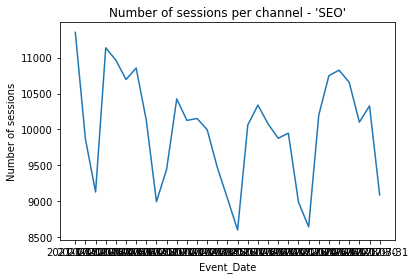

In [57]:
plt.plot(data.event_date, data.Number_of_sessions)
plt.title("Number of sessions per channel - 'SEO'")
plt.xlabel("Event_Date")
plt.ylabel("Number of sessions")
plt.show()